In [ ]:
# Desafio: Caçada de OVNIs
# Usando o dataset ovnis.json responda as seguintes perguntas:

# https://drive.google.com/file/d/1YT9p45iT18FTfV4zou4nBZKvneExRNM_/view?usp=sharing

# Quais os 5 formatos de OVNI mais comuns nos relatos?

# Qual o horário mais difícil para avistarmos um OVNI em forma de Charuto?

# Qual o estado com mais aparição de ovni?

# /content/drive/MyDrive/Colab Notebooks/teste scafold/ovnis.json

In [ ]:
# Irei tansformar o JSON em um dataframe, pois acho mais fácil de trabalhar assim.

import pandas as pd
ovni_df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/teste scafold/ovnis.json")
ovni_df.head()

,occured,city,state,shape,duration,summary,posted
0,12/22/19 23:00,Clarkston,MI,Circle,5 minutes,7 white lights seen to the W side of the state...,12/22/19
1,12/22/19 22:15,Kennett Square,PA,Triangle,3min,Witness to triangle style craft. View was from...,12/22/19
2,12/22/19 21:00,Bethlehem,PA,Unknown,Hours,"Hello, My wife and I been seeing these objects...",12/22/19
3,12/22/19 20:35,Fishkill,NY,Disk,1 minute,"Disc Shape Hovering, ((Starlink satellites?))",12/22/19
4,12/22/19 20:00,Strathroy (Canada),ON,Light,15 minutes,Chain of white lights following each other upw...,12/22/19


In [ ]:
# Imprimi o as informaçoes do dataframe para poder avaliar quantas linhas tenho de informação em cada coluna 
# E qual o tipo de data type que tenho em cada coluna.
ovni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87594 entries, 0 to 87593
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   occured   87594 non-null  object
 1   city      87394 non-null  object
 2   state     82456 non-null  object
 3   shape     85159 non-null  object
 4   duration  84518 non-null  object
 5   summary   87567 non-null  object
 6   posted    87593 non-null  object
dtypes: object(7)
memory usage: 4.7+ MB


In [ ]:
# Imprimi também a descrição da dataframe para caso seja necessário na análise.
ovni_df.describe()

,occured,city,state,shape,duration,summary,posted
count,87594,87394,82456,85159,84518,87567,87593
unique,74084,19234,67,22,7996,86542,393
top,11/7/15 18:00,Phoenix,CA,Light,5 minutes,MADAR Node 141,12/12/09
freq,104,437,9473,18152,6220,39,1623


In [363]:
#Irei começar na ordem das perguntas. 

#Quais os 5 formatos de OVNI mais comuns nos relatos?

## Para obter essa esposta, eu irei contar a quantidade de repetições das informações da coluna 'Shape'. que é Formato em inglês.
## Utilizarei a função "value_counts()" para determinar o que mais se repete.



### Resposta: De acordo com a análise,  os 5 formatos de OVNI mais comuns nos relatos são: 
# 1º Light (formato de luz) com 18152 aparições.
# 2º Circle (formato de circulo) com 10077 aparições.
# 3º Triangle (formato de triangulo) com 7857 aparições.
# 4º Fireball (formato de bola de fogo) com 7071 aparições.
# 5º Unknown (formato desconhecido) com 6152 aparições.


ovni_df['shape'].value_counts()

Light         18152
Circle        10077
Triangle       7857
Fireball       7071
Unknown        6152
Sphere         6062
Other          5709
Disk           4453
Oval           3833
Formation      2829
Changing       2103
Cigar          1981
Flash          1659
Rectangle      1592
Cylinder       1359
Diamond        1265
Chevron         943
Teardrop        763
Egg             665
Cone            347
Cross           286
TRIANGULAR        1
Name: shape, dtype: int64

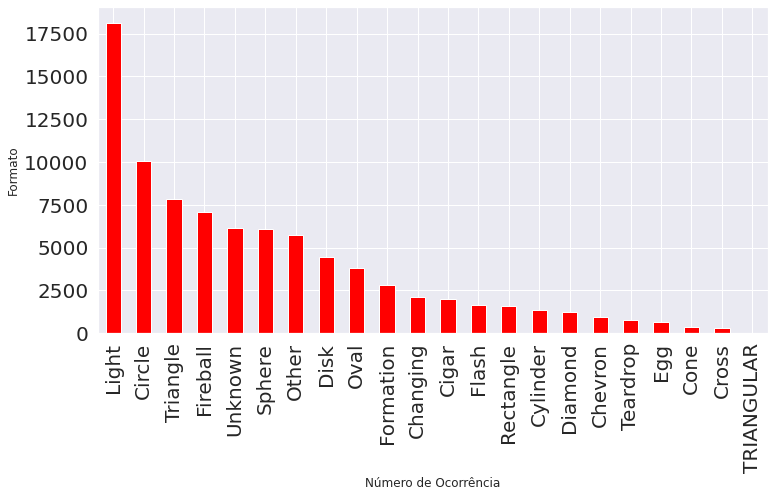

In [349]:
# Para melhorar a vizualização das informações acima, podemos imprimir um gráfico de barras simples para verificar.

ovni_df['shape'].value_counts().plot(kind='bar', figsize = (12,6), xlabel=('Número de Ocorrência'), ylabel=('Formato'), color='red', fontsize= 20)

In [ ]:
# Qual o horário mais difícil para avistarmos um OVNI em forma de Charuto?

# Para essa análise, irei primeiro separar a coluna "occured" em duas novas colunas, occured_date (data ocorrida) e occured_hour (hora ocorrida) -
# - para termos análisarmos em cima das horas do aparecimento, já que estamos procurando a menor frequência do aparecimento dos OVNI's de formato de charuto.
# Irei usar a função de split para separar as informações da colula "occured" em duas.
# Retirarei a coluna 'occured' para não haver duplicidade de informação na dataframe.

In [ ]:
ovni_df['occured'][0::87593] # Exemplo de linhas com preenchimento de data+hora e somente data.

0        12/22/19 23:00
87593           10/1/19
Name: occured, dtype: object

In [ ]:
ovni_df["occured"].str.split(expand = True) # Sem problemas com o tratamento para as colunas sem hora.

,0,1
0,12/22/19,23:00
1,12/22/19,22:15
2,12/22/19,21:00
3,12/22/19,20:35
4,12/22/19,20:00
...,...,...
87589,10/1/19,00:00
87590,10/1/19,00:00
87591,10/1/19,None
87592,10/1/19,None


In [ ]:
ovni_df[["occured_date","occured_hour"]] = ovni_df["occured"].str.split(expand = True) # alterei o nome das duas novas columas para occured_date (data ocorrida) e occured_hour (hora ocorrida).

ovni_df.head()
# A nova dataframe tem agora, separadamente as informações de Data e Hora do evento ocorrudo no final da tabela.

,occured,city,state,shape,duration,summary,posted,occured_date,occured_hour
0,12/22/19 23:00,Clarkston,MI,Circle,5 minutes,7 white lights seen to the W side of the state...,12/22/19,12/22/19,23:00
1,12/22/19 22:15,Kennett Square,PA,Triangle,3min,Witness to triangle style craft. View was from...,12/22/19,12/22/19,22:15
2,12/22/19 21:00,Bethlehem,PA,Unknown,Hours,"Hello, My wife and I been seeing these objects...",12/22/19,12/22/19,21:00
3,12/22/19 20:35,Fishkill,NY,Disk,1 minute,"Disc Shape Hovering, ((Starlink satellites?))",12/22/19,12/22/19,20:35
4,12/22/19 20:00,Strathroy (Canada),ON,Light,15 minutes,Chain of white lights following each other upw...,12/22/19,12/22/19,20:00


In [ ]:
ovni_df = ovni_df.drop(columns=['occured']) # Achei redundancia reter a coluna 'ocured' então removi a mesma para não ter duplicidade de informação na dataframe.
ovni_df.head()

,city,state,shape,duration,summary,posted,occured_date,occured_hour
0,Clarkston,MI,Circle,5 minutes,7 white lights seen to the W side of the state...,12/22/19,12/22/19,23:00
1,Kennett Square,PA,Triangle,3min,Witness to triangle style craft. View was from...,12/22/19,12/22/19,22:15
2,Bethlehem,PA,Unknown,Hours,"Hello, My wife and I been seeing these objects...",12/22/19,12/22/19,21:00
3,Fishkill,NY,Disk,1 minute,"Disc Shape Hovering, ((Starlink satellites?))",12/22/19,12/22/19,20:35
4,Strathroy (Canada),ON,Light,15 minutes,Chain of white lights following each other upw...,12/22/19,12/22/19,20:00


In [ ]:
# Filtrei somente as aparições de ovnis com o formato de charuto e seus horarios criando um novo dataframe somente com a coluna shape(formato) e occured_hour(hora ocorrida)

ovni_shape_hour = ovni_df[['shape','occured_hour']]
ovni_shape_hour.head()

,shape,occured_hour
0,Circle,23:00
1,Triangle,22:15
2,Unknown,21:00
3,Disk,20:35
4,Light,20:00


In [ ]:
# Em seguida, irei criar uma dataframe com o filtro "Cigar" na coluna "shape" para imprimir somente as aparições de formato de Charuto.
# No levantamento de informações da primeira questão, existiam 1981 resultados para "Cigar" no agrupamento, logo, esse é o numero que eu devo conseguir.

ovni_cigar_hour = ovni_shape_hour[ovni_shape_hour['shape'] == 'Cigar']

ovni_cigar_hour

,shape,occured_hour
85,Cigar,06:45
89,Cigar,06:00
103,Cigar,17:04
246,Cigar,19:25
272,Cigar,01:15
...,...,...
87449,Cigar,09:40
87468,Cigar,15:30
87470,Cigar,19:00
87474,Cigar,11:36


In [ ]:
# Para encontrar a hora em que a frequência do formato charuto é menor, irei agrupar todas as linhas por HORA. 
# Então, para utilizar a função do agrupamento por hora, preciso que o data type da coluna "occured_hour" seja "datetime64"

ovni_cigar_hour['occured_hour'] = ovni_cigar_hour['occured_hour'].astype('datetime64') #alteração do datatype da coluna "occured_hour" para "datetime64"

ovni_cigar_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 85 to 87529
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   shape         1981 non-null   object        
 1   occured_hour  1952 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 46.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Realizei a impressão do dataframe para verificar.
# A transformação traz data, por padrão deixei a data atual para que possa ser agrupado com mais facilidade.

ovni_cigar_hour.head(10) 

,shape,occured_hour
85,Cigar,2022-10-21 06:45:00
89,Cigar,2022-10-21 06:00:00
103,Cigar,2022-10-21 17:04:00
246,Cigar,2022-10-21 19:25:00
272,Cigar,2022-10-21 01:15:00
291,Cigar,NaT
359,Cigar,2022-10-21 06:35:00
743,Cigar,2022-10-21 18:15:00
746,Cigar,2022-10-21 17:45:00
826,Cigar,2022-10-21 05:20:00


In [ ]:
# Realizei o agrupamento por hora da coluna "occured_hour" por hora. 

agrupamento_hora = ovni_cigar_hour.groupby([ovni_cigar_hour['occured_hour'].dt.to_period('H'), 'shape']).count().unstack()

agrupamento_hora

# No dataframe impresso, temos a frequência dos aparecimentos agrupados hora a hora.

,occured_hour
shape,Cigar
occured_hour,
2022-10-21 00:00,68
2022-10-21 01:00,66
2022-10-21 02:00,34
2022-10-21 03:00,29
2022-10-21 04:00,35
2022-10-21 05:00,34
2022-10-21 06:00,38
2022-10-21 07:00,67


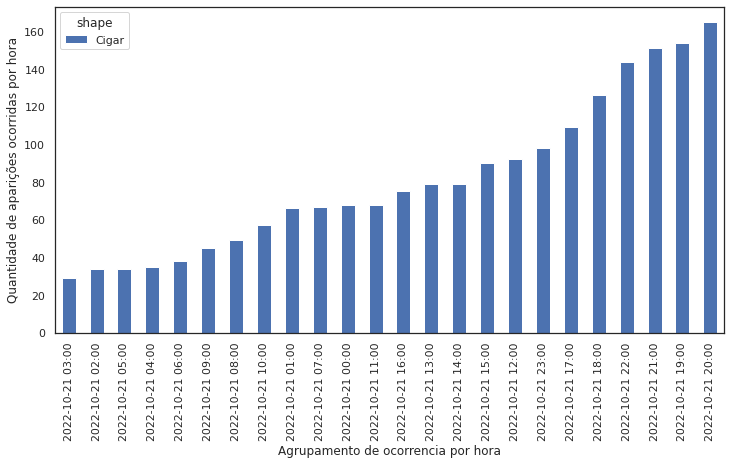

In [ ]:
# Para melhorar a vizualização da tabela acima, ordenei as informações e imprimi uma gráfico de barras para melhor vizualização.
# Podemos notar já que a hora com menos aparições de ovnis com formato de charuto é as 03:00 da manhã.

agrupamento_hora.columns = agrupamento_hora.columns.droplevel()
agrupamento_hora.sort_values(by="Cigar").plot(kind='bar', figsize = (12,6), xlabel=('Agrupamento de ocorrencia por hora'), ylabel=('Quantidade de aparições ocorridas por hora'))

In [309]:
agrupamento_hora.sort_values(by="Cigar") #ordenação dos valores.

# Ordenando a dataframe, podemos identificar que a menor incidencia de aparecimento dele é as 03:00 da manhã, assim como mostra o gráfico.

### Resposta: O horário mais difícil para avistarmos um OVNI em forma de Charuto é as 03:00 da manhã (entre as 03:00 e 03:59) com apenas 29 aparições no total nesse horario.

shape,Cigar
occured_hour,
2022-10-21 03:00,29
2022-10-21 02:00,34
2022-10-21 05:00,34
2022-10-21 04:00,35
2022-10-21 06:00,38
2022-10-21 09:00,45
2022-10-21 08:00,49
2022-10-21 10:00,57
2022-10-21 01:00,66


In [362]:
# Qual o estado com mais aparição de ovnis?
# Para responder essa pergunta, irei realizar uma contagem na coluna "state".


### Resposta: o estado com mais aparição de ovnis é o estado da california com 9473 aparições.
### Seguido do estado da Florida com 5260, Washington com 3830, Texas com 3458 e Nova Yorke com 3406 aparições.

ovni_df['state'].value_counts().head(10)

CA    9473
FL    5260
WA    3830
TX    3458
NY    3406
PA    3093
AZ    2863
OH    2715
IL    2537
NC    2431
Name: state, dtype: int64

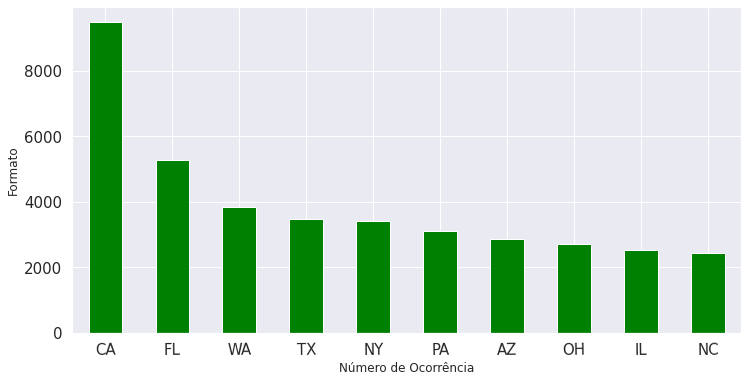

In [361]:
# Para melhor vizualização, imprimi aqui um gráfico com os 10 estados com mais aparições para concluir a análise.

ovni_df['state'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', figsize = (12,6), xlabel=('Sigla Estado'), ylabel=('Quantidade de Ocorrência'), color='green', rot=1, fontsize = 15)